# Added advanced feature engineering + text preprocessing



### TOKEN FEATURES
### eg: sachin is a great batsman ---> here wrds = 3, stop words = 2, token = 5
1. cwc_min ----> no of common wrds/min(wrds(q1,q2))
2. cwc_max -----> no of common wrds/max(wrds(q1,q2))
3. ctc_min -----> no of common tokens/min(tokens(q1,q2))
4. ctc_max -----> no of common tokens/max(tokens(q1,q2))
5. csc_min -----> no of common stop words/min(stop words(q1,q2))
6. csc_max -----> no of common stop words/max(stop words(q1,q2))
7. last_word_equal ---> if both last wrd in both sent match then == 1, else 0
8. first_word_equal--->if both first wrd in both sent match then == 1, else 0

### LENGTH BASED FEATURES
1. mean_length ---->mean length of both the qs
2. abs_length_diff--> find the difference in th both lengths and then take absolute of it
3. longest_substr_ratio-->

### FUZZY FEATURES
1. fuzz_ratio --->
2. fuzz_partial_ratio --->
3. token_sort_ratio --->
4. token_set_ratio --->

In [ ]:
 from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings("ignore")

In [ ]:
new_df = pd.read_csv('/content/drive/MyDrive/NLP/duplicate sent proj/new_df.csv')

In [ ]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,88949,176616,176617,What is the best Java program to implement stack?,What are some good Java programs to practice w...,0
1,277672,545936,545937,Can Donald Trump still win the election?,Does Donald Trump has chamces to win US electi...,1
2,105726,209703,209704,How can one be less of an introvert?,Can one be an extrovert but also an introvert?,0
3,75188,149411,149412,People shouldn't have the right to commit suic...,Why don't we have a right to commit suicide?,1
4,15679,31293,31294,How can I make money as a 13 year old?,How can I make money as a thirteen year old?,0


In [ ]:
new_df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,0
question2,0
is_duplicate,0


## Data preprocessing on the data

In [ ]:

def preprocess(q):

    # create the lowercase
    q = str(q).lower().strip()

    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')

    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')

    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)

    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")

    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()

    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()


    return q


In [ ]:
preprocess("I've already wasn't <b>done</b>?")

'i have already was not done'

In [ ]:
new_df['question1'] = new_df['question1'].apply(preprocess)
new_df['question2'] = new_df['question2'].apply(preprocess)

In [ ]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,88949,176616,176617,what is the best java program to implement stack,what are some good java programs to practice with,0
1,277672,545936,545937,can donald trump still win the election,does donald trump has chamces to win us elections,1
2,105726,209703,209704,how can one be less of an introvert,can one be an extrovert but also an introvert,0
3,75188,149411,149412,people should not have the right to commit sui...,why do not we have a right to commit suicide,1
4,15679,31293,31294,how can i make money as a 13 year old,how can i make money as a thirteen year old,0


In [ ]:
new_df['q1_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df['question2'].str.len()

In [ ]:
new_df['q1_word'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_word'] = new_df['question2'].apply(lambda row: len(row.split(" ")))

In [ ]:
def common_words(row):
  w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
  w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
  return len(w1 & w2)

In [ ]:
new_df['word_common'] = new_df.apply(common_words, axis = 1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_word,q2_word,word_common
0,88949,176616,176617,what is the best java program to implement stack,what are some good java programs to practice with,0,48,49,9,9,3
1,277672,545936,545937,can donald trump still win the election,does donald trump has chamces to win us elections,1,39,49,7,9,3
2,105726,209703,209704,how can one be less of an introvert,can one be an extrovert but also an introvert,0,35,45,8,9,5
3,75188,149411,149412,people should not have the right to commit sui...,why do not we have a right to commit suicide,1,50,44,9,10,6
4,15679,31293,31294,how can i make money as a 13 year old,how can i make money as a thirteen year old,0,37,43,10,10,9


In [ ]:
def total_words(row):
  w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
  w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
  return (len(w1) + len(w2))

In [ ]:
new_df['total_words'] = new_df.apply(total_words, axis =1)

In [ ]:
new_df['word_share'] = new_df['word_common']/new_df['total_words']

In [ ]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_word,q2_word,word_common,total_words,word_share
0,88949,176616,176617,what is the best java program to implement stack,what are some good java programs to practice with,0,48,49,9,9,3,18,0.166667
1,277672,545936,545937,can donald trump still win the election,does donald trump has chamces to win us elections,1,39,49,7,9,3,16,0.187500
2,105726,209703,209704,how can one be less of an introvert,can one be an extrovert but also an introvert,0,35,45,8,9,5,16,0.312500
3,75188,149411,149412,people should not have the right to commit sui...,why do not we have a right to commit suicide,1,50,44,9,10,6,19,0.315789
4,15679,31293,31294,how can i make money as a 13 year old,how can i make money as a thirteen year old,0,37,43,10,10,9,20,0.450000


## add the adv features enginerring (more 25 features)

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
def fetch_token_features(row):
  q1 = row['question1']
  q2 = row['question2']

  Div = 0.0001

  stop_wrds = stopwords.words('english')

  token_features = [0.0]*8

  # convert sent into tokends

  q1_tokens = q1.split()
  q2_tokens = q2.split()

  if len(q1_tokens) == 0 or len(q2_tokens) == 0:
    return token_features

  # get the non- stopwrds in qs -- words
  q1_words = set([word for word in q1_tokens if word not in stop_wrds])
  q2_words = set([word for word in q2_tokens if word not in stop_wrds])

  # stop words common
  q1_stops = set([word for word in q1_tokens if word in stop_wrds])
  q2_stops = set([word for word in q2_tokens if word in stop_wrds])

  # common words
  common_wrd_count = len(q1_words.intersection(q2_words))

  # common stop words
  common_stop_count = len(q1_stops.intersection(q2_stops))

  # common token words
  common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))

  token_features[0] = common_wrd_count / (len(q1_words) + Div)
  token_features[1] = common_wrd_count / (len(q2_words) + Div)
  token_features[2] = common_stop_count / (len(q1_stops) + Div)
  token_features[3] = common_stop_count / (len(q2_stops) + Div)
  token_features[4] = common_token_count / (len(q1_tokens) + Div)
  token_features[5] = common_token_count / (len(q2_tokens) + Div)


  ## token last word same
  token_features[6] = int(q1_tokens[-1]==q2_tokens[-1])

  ## first word same
  token_features[7] = int(q1_tokens[0]==q2_tokens[0])

  return token_features

In [ ]:
token_features = new_df.apply(fetch_token_features, axis = 1)

In [ ]:
new_df['cwc_min'] = list(map(lambda x: x[0], token_features))
new_df['cwc_max'] = list(map(lambda x: x[1], token_features))
new_df['csc_min'] = list(map(lambda x: x[2], token_features))
new_df['csc_max'] = list(map(lambda x: x[3], token_features))
new_df['ctc_min'] = list(map(lambda x: x[4], token_features))
new_df['ctc_max'] = list(map(lambda x: x[5], token_features))
new_df['last_word_equal'] = list(map(lambda x: x[6], token_features))
new_df['first_word_equal'] = list(map(lambda x: x[7], token_features))

In [ ]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_word,q2_word,...,total_words,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_equal,first_word_equal
0,88949,176616,176617,what is the best java program to implement stack,what are some good java programs to practice with,0,48,49,9,9,...,18,0.166667,0.199996,0.249994,0.499988,0.399992,0.333330,0.333330,0,1
1,277672,545936,545937,can donald trump still win the election,does donald trump has chamces to win us elections,1,39,49,7,9,...,16,0.187500,0.599988,0.499992,0.000000,0.000000,0.428565,0.333330,0,0
2,105726,209703,209704,how can one be less of an introvert,can one be an extrovert but also an introvert,0,35,45,8,9,...,16,0.312500,0.666644,0.499988,0.599988,0.749981,0.624992,0.555549,1,0
3,75188,149411,149412,people should not have the right to commit sui...,why do not we have a right to commit suicide,1,50,44,9,10,...,19,0.315789,0.749981,0.999967,0.599988,0.428565,0.666659,0.599994,1,0
4,15679,31293,31294,how can i make money as a 13 year old,how can i make money as a thirteen year old,0,37,43,10,10,...,20,0.450000,0.799984,0.799984,0.999980,0.999980,0.899991,0.899991,1,1


In [ ]:
!pip install distance

In [ ]:
import distance
def fetch_length_features(row):
  q1 = row['question1']
  q2 = row['question2']

  length_features = [0.0]*3
  # convert sent into tokensa
  q1_tokens = q1.split()
  q2_tokens = q2.split()

  if len(q1_tokens) == 0 or len(q2_tokens) == 0:
    return length_features

  # abs length features
  length_features[0] = abs(len(q1) - len(q2))

  # mean length of tokens
  length_features[1] = (len(q1_tokens)+len(q2_tokens))/2

  strs = list(distance.lcsubstrings(q1, q2))
  length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)

  return length_features

In [ ]:
import distance

def fetch_length_features(row):
    q1 = row['question1']
    q2 = row['question2']

    length_features = [0.0] * 3
    # convert sent into tokens
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features

    # abs length features
    length_features[0] = abs(len(q1) - len(q2))

    # mean length of tokens
    length_features[1] = (len(q1_tokens) + len(q2_tokens)) / 2

    strs = list(distance.lcsubstrings(q1, q2))
    # Check if strs is empty before accessing strs[0]
    if strs:  # This checks if strs is not empty
        length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    else:
        length_features[2] = 0.0  # Assign a default value of 0.0 if strs is empty

    return length_features

In [ ]:
length_features = new_df.apply(fetch_length_features, axis = 1)

new_df['abs_leng_diff'] = list(map(lambda x: x[0], length_features))
new_df['mean_len'] = list(map(lambda x: x[1], length_features))
new_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [ ]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_word,q2_word,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_equal,first_word_equal,abs_leng_diff,mean_len,longest_substr_ratio
0,88949,176616,176617,what is the best java program to implement stack,what are some good java programs to practice with,0,48,49,9,9,...,0.249994,0.499988,0.399992,0.333330,0.333330,0,1,1,9.0,0.265306
1,277672,545936,545937,can donald trump still win the election,does donald trump has chamces to win us elections,1,39,49,7,9,...,0.499992,0.000000,0.000000,0.428565,0.333330,0,0,10,8.0,0.350000
2,105726,209703,209704,how can one be less of an introvert,can one be an extrovert but also an introvert,0,35,45,8,9,...,0.499988,0.599988,0.749981,0.624992,0.555549,1,0,10,8.5,0.361111
3,75188,149411,149412,people should not have the right to commit sui...,why do not we have a right to commit suicide,1,50,44,9,10,...,0.999967,0.599988,0.428565,0.666659,0.599994,1,0,6,9.5,0.533333
4,15679,31293,31294,how can i make money as a 13 year old,how can i make money as a thirteen year old,0,37,43,10,10,...,0.799984,0.999980,0.999980,0.899991,0.899991,1,1,6,10.0,0.684211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,38560,76821,76822,how much money do cardiologists make per annum,what was the sa and what is its history,0,46,39,8,9,...,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,7,8.5,0.075000
29996,80103,159124,159125,what are the implications of losing 10 pounds ...,is there a safe method to lose 10 pounds in 2 ...,1,55,50,11,12,...,0.571420,0.199996,0.199996,0.454541,0.416663,1,0,5,11.5,0.392157
29997,278679,547881,547882,what are throwback thursdays on instagram,what are throwback thursdays on instagram how...,1,41,62,6,11,...,0.749981,0.999967,0.599988,0.999983,0.599994,0,1,21,8.0,0.976190
29998,138650,274477,274478,can someone read my text messages if they bloc...,if someone blocked me will they still get my ...,1,52,58,10,12,...,0.499992,0.799984,0.799984,0.699993,0.636358,0,0,6,10.5,0.301887


In [ ]:
pip install fuzzywuzzy

In [ ]:
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
  q1 = row['question1']
  q2 = row['question2']

  fuzzy_features = [0.0]*4
  # fuzzy ratio
  fuzzy_features[0] = fuzz.QRatio(q1, q2)
  # fuzz aprtial ratio
  fuzzy_features[1] = fuzz.partial_ratio(q1, q2)
  # token sort ratio
  fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)
  # token set ratio
  fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

  return fuzzy_features

In [ ]:
fuzzy_features =new_df.apply(fetch_fuzzy_features, axis =1)

new_df['fuzz_ratio'] = list(map(lambda x:x[0], fuzzy_features))
new_df['fuzz_partial_ratio'] = list(map(lambda x:x[1], fuzzy_features))
new_df['token_sort_ratio'] = list(map(lambda x:x[2], fuzzy_features))
new_df['token_set_ratio'] = list(map(lambda x:x[3], fuzzy_features))

In [ ]:
print(new_df.shape)
new_df.head()

(30000, 28)


,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_word,q2_word,...,ctc_max,last_word_equal,first_word_equal,abs_leng_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
0,88949,176616,176617,what is the best java program to implement stack,what are some good java programs to practice with,0,48,49,9,9,...,0.333330,0,1,1,9.0,0.265306,58,58,54,62
1,277672,545936,545937,can donald trump still win the election,does donald trump has chamces to win us elections,1,39,49,7,9,...,0.333330,0,0,10,8.0,0.350000,68,64,73,73
2,105726,209703,209704,how can one be less of an introvert,can one be an extrovert but also an introvert,0,35,45,8,9,...,0.555549,1,0,10,8.5,0.361111,68,71,62,79
3,75188,149411,149412,people should not have the right to commit sui...,why do not we have a right to commit suicide,1,50,44,9,10,...,0.599994,1,0,6,9.5,0.533333,74,84,70,84
4,15679,31293,31294,how can i make money as a 13 year old,how can i make money as a thirteen year old,0,37,43,10,10,...,0.899991,1,1,6,10.0,0.684211,88,78,85,96


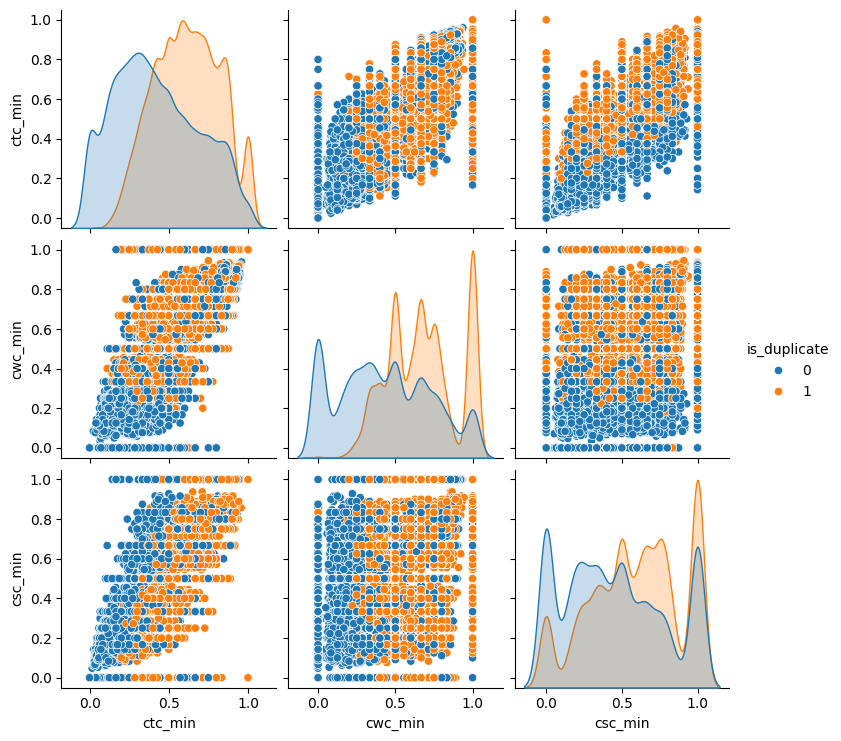

In [ ]:
sns.pairplot(new_df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')

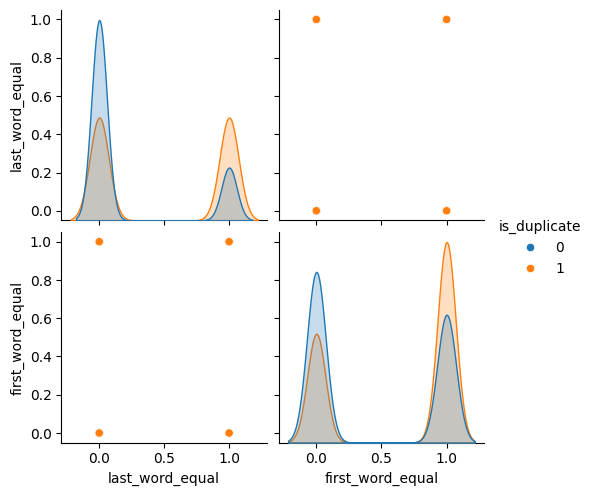

In [ ]:
sns.pairplot(new_df[['last_word_equal', 'first_word_equal', 'is_duplicate']], hue = 'is_duplicate')

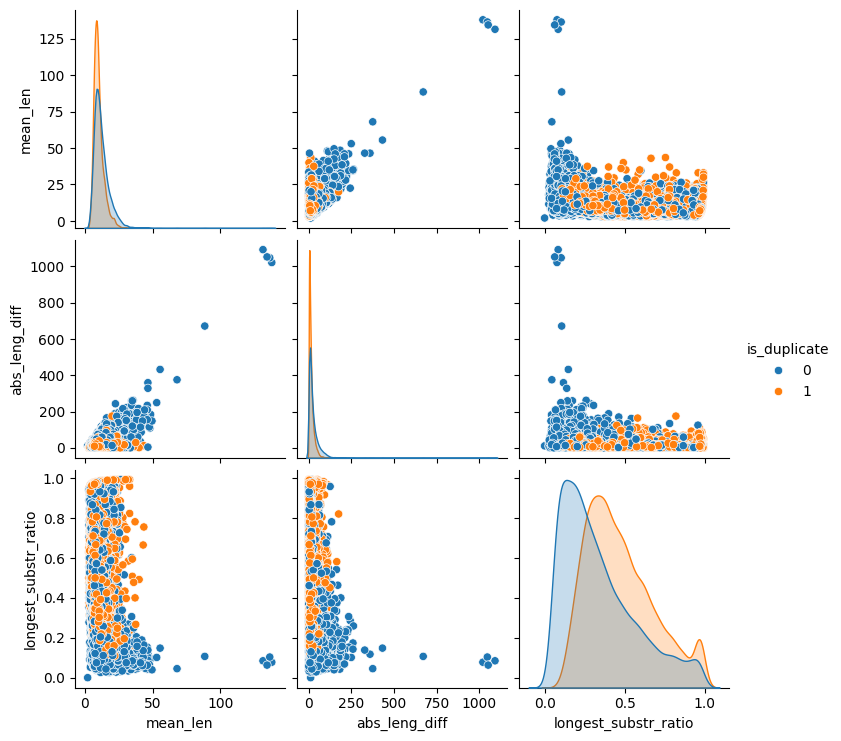

In [ ]:
sns.pairplot(new_df[['mean_len', 'abs_leng_diff', 'longest_substr_ratio', 'is_duplicate']], hue = 'is_duplicate')

## mean and bs diff is not looking to be of much help, but the substring looks to be helpful

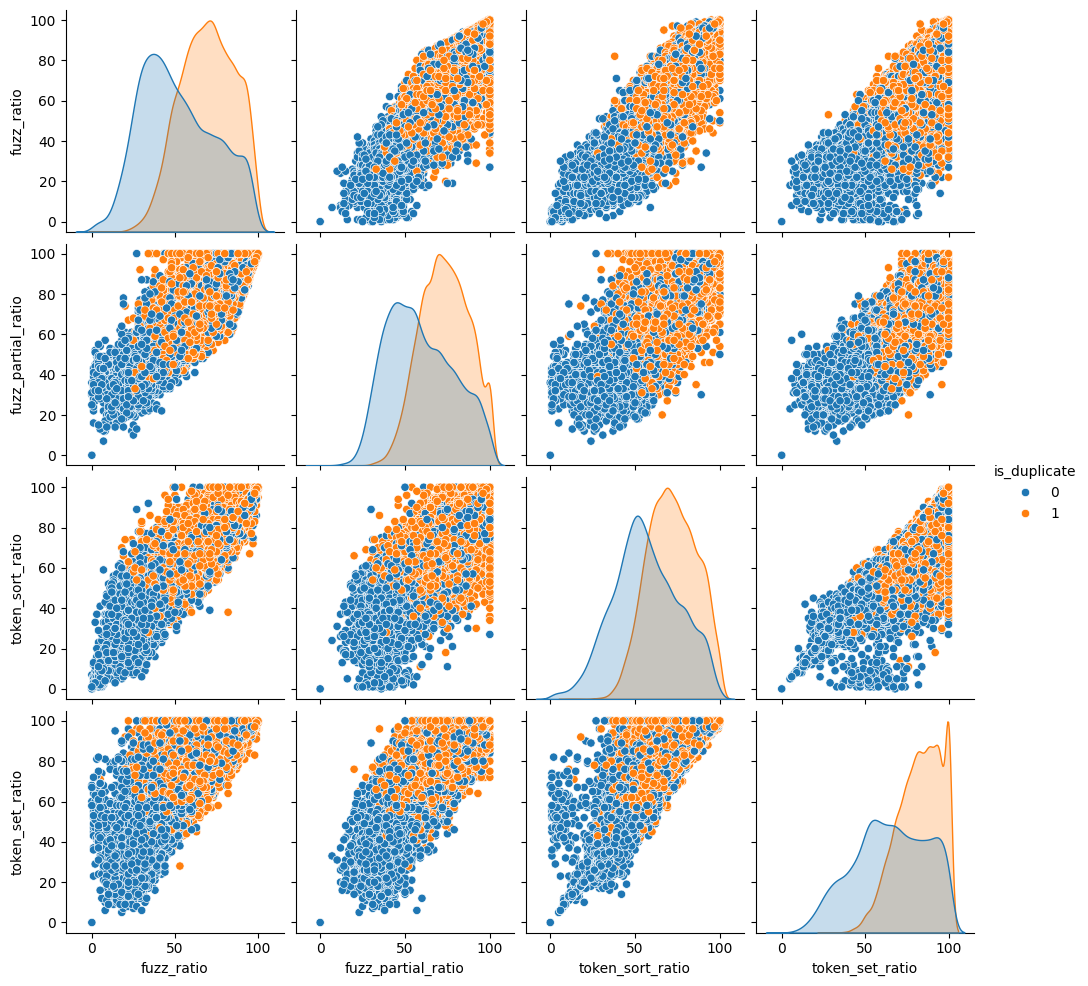

In [ ]:
sns.pairplot(new_df[['fuzz_ratio', 'fuzz_partial_ratio', 'token_sort_ratio', 'token_set_ratio', 'is_duplicate']], hue = 'is_duplicate')

In [ ]:
## Using TSNE for dimenstionality reduction for the 15 features added now

In [ ]:
### copy code from the lan

In [ ]:
ques_df = new_df[['question1', 'question2']]
ques_df.head()

,question1,question2
0,what is the best java program to implement stack,what are some good java programs to practice with
1,can donald trump still win the election,does donald trump has chamces to win us elections
2,how can one be less of an introvert,can one be an extrovert but also an introvert
3,people should not have the right to commit sui...,why do not we have a right to commit suicide
4,how can i make money as a 13 year old,how can i make money as a thirteen year old


In [ ]:
## Df with all the features
final_df = new_df.drop(columns = ['id', 'qid1', 'qid2', 'question1', 'question2'])
print(final_df.shape)
final_df.head()

(30000, 23)


,is_duplicate,q1_len,q2_len,q1_word,q2_word,word_common,total_words,word_share,cwc_min,cwc_max,...,ctc_max,last_word_equal,first_word_equal,abs_leng_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
0,0,48,49,9,9,3,18,0.166667,0.199996,0.249994,...,0.333330,0,1,1,9.0,0.265306,58,58,54,62
1,1,39,49,7,9,3,16,0.187500,0.599988,0.499992,...,0.333330,0,0,10,8.0,0.350000,68,64,73,73
2,0,35,45,8,9,5,16,0.312500,0.666644,0.499988,...,0.555549,1,0,10,8.5,0.361111,68,71,62,79
3,1,50,44,9,10,6,19,0.315789,0.749981,0.999967,...,0.599994,1,0,6,9.5,0.533333,74,84,70,84
4,0,37,43,10,10,9,20,0.450000,0.799984,0.799984,...,0.899991,1,1,6,10.0,0.684211,88,78,85,96


In [ ]:
# Create a dataset with final_df
final_df.to_csv('/content/drive/MyDrive/NLP/duplicate sent proj/final_df_1.csv', index=False)

In [ ]:
ques_df.to_csv('/content/drive/MyDrive/NLP/duplicate sent proj/ques_df_1.csv', index = False)

In [ ]:
# prompt: shoe row no 2300 and 7708 in the ques_d f dataset

import pandas as pd


print(ques_df.iloc[[2300, 7708]])


                                  question1  \
2300  how do you feel when you fall in love   
7708   how do i become a computer scientist   

                                              question2  
2300                    how does it feels to be in love  
7708  who is a computer scientist and how to become one  
